<a href="https://colab.research.google.com/github/Harsh40863/machine_learning_algo/blob/main/linear_regression__bg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
cal=fetch_california_housing()

In [ ]:
cal

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
df=pd.DataFrame(cal.data,columns=cal.feature_names)

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [ ]:
x=df
y=pd.DataFrame(cal.target,columns=["Targets"])

In [ ]:
y .head()

,Targets
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:

y=y.values

In [ ]:
y

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split the raw features and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize (normalize) features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias (column of 1s)
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]


In [ ]:
# batch grdient decent
def batch_gradient_descent(X, y, lr=0.001, epochs=10000):
  m,n=X.shape
  theta=np.random.randn(n,1)
  loss_history=[]
  for epoch in range(epochs):
    gradients = 2/m * X.T.dot(X.dot(theta) - y)
    theta -= lr * gradients
    loss = np.mean((X.dot(theta) - y)**2)
    loss_history.append(loss)

  return theta, loss_history

In [ ]:
def stochastic_gradient_descent(X, y, lr=0.01, epochs=100):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    loss_history = []

    for epoch in range(epochs):
        for i in range(m):
            rand_i = np.random.randint(m)
            xi = X[rand_i:rand_i+1]
            yi = y[rand_i:rand_i+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradients
        loss = np.mean((X.dot(theta) - y)**2)
        loss_history.append(loss)

    return theta, loss_history


In [ ]:
def mini_batch_gradient_descent(X, y, lr=0.01, epochs=100, batch_size=32):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    loss_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/xi.shape[0] * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradients

        loss = np.mean((X.dot(theta) - y)**2)
        loss_history.append(loss)

    return theta, loss_history


/tmp/ipython-input-16-2135758634.py:13: RuntimeWarning: overflow encountered in square
  loss = np.mean((X.dot(theta) - y)**2)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-16-2135758634.py:12: RuntimeWarning: invalid value encountered in subtract
  theta -= lr * gradients


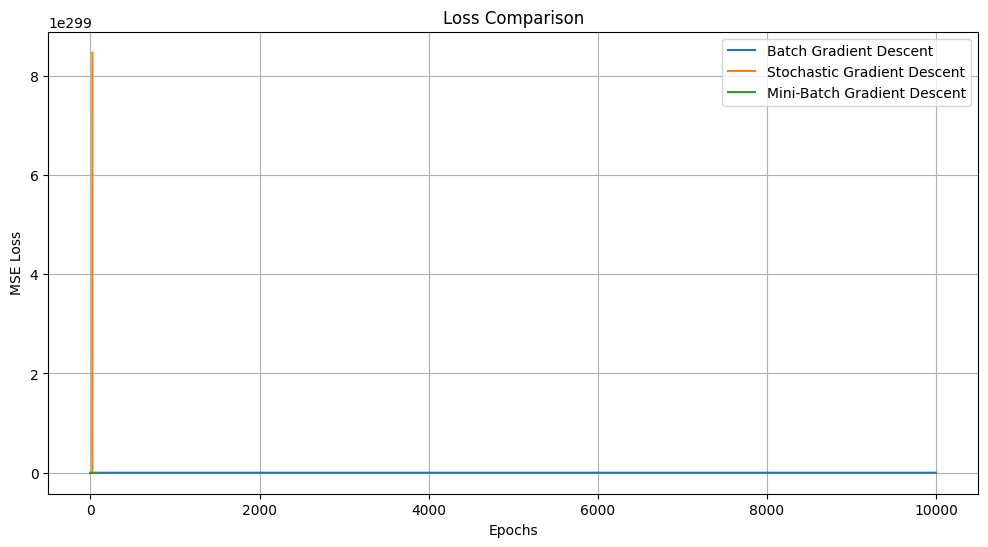

In [ ]:
theta_bgd, loss_bgd = batch_gradient_descent(X_train_scaled, y_train)
theta_sgd, loss_sgd = stochastic_gradient_descent(X_train_scaled, y_train)
theta_mbgd, loss_mbgd = mini_batch_gradient_descent(X_train_scaled, y_train)

plt.figure(figsize=(12, 6))
plt.plot(loss_bgd, label="Batch Gradient Descent")
plt.plot(loss_sgd, label="Stochastic Gradient Descent")
plt.plot(loss_mbgd, label="Mini-Batch Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(theta_bgd)
print(theta_sgd)
print(theta_mbgd)

[[ 2.07194693]
 [ 0.971985  ]
 [ 0.16256569]
 [-0.47684568]
 [ 0.47278651]
 [ 0.0106315 ]
 [-0.04751952]
 [-0.49893488]
 [-0.48417563]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[ 2.0792666 ]
 [ 0.81671404]
 [ 0.09431201]
 [-0.28682836]
 [ 0.35029497]
 [-0.01868218]
 [ 0.0764363 ]
 [-0.91062897]
 [-0.85335456]]


In [ ]:
# Predict on test set using learned theta
y_pred = X_test_scaled.dot(theta_bgd)


In [ ]:
def r2_score(y_test, y_pred):
    ss_res = np.sum((y_test - y_pred)**2)
    ss_tot = np.sum((y_test - np.mean(y_test))**2)
    return 1 - (ss_res / ss_tot)


In [ ]:
print(r2_score(y_test, y_pred))

0.5565958437306274
